In [13]:
%matplotlib inline
%load_ext autoreload
! pip install git+https://github.com/avivajpeyi/pspline_psd.git -q

# Example: LISA White Dwarf background

In [1]:
import numpy as np
import pandas as pd
import slipper
from slipper.example_datasets.lisa_data import lisa_wd_strain
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


data = lisa_wd_strain()
data = pd.DataFrame(data, columns=["strain"])
dt = 5.00000079
data["time"] = np.arange(0, len(data) * dt, dt)
data.head()

array([ 1.33917e-21,  1.32898e-21,  1.31868e-21, ..., -3.79158e-22,
       -3.53012e-22, -3.24606e-22])

In [ ]:

s_in_day = 24 * 60 * 60
fig, (ax0, ax1) = plt.subplots(nrows=2, layout='constrained')
ax0.plot(data.time/s_in_day, data.strain)
ax0.set_xlabel('Time (days)')
ax0.set_ylabel('Strain')

pdgrm, freqs = ax1.psd(data.strain, NFFT=8192, Fs=1 / dt, scale_by_freq=False, window=mlab.window_none, )
ax1.set_xscale('log')
ax1.set_xlabel("Frequency (Hz)")
ax1.grid(False)

# LISA is sensitive from 10^-4 to 10^-1 Hz, plot a green box around that
sensitivity_range= [9 ** -4, 11 ** -1]
ax1.axvspan(*sensitivity_range, alpha=0.2, color="tab:green")
plt.show()

In [39]:
from slipper.sample.spline_model_sampler import fit_data_with_log_spline_model

# get pdgrm inside sensitivity range + Fit a spline model to the data
sensitivity_range_idx = np.where((freqs > sensitivity_range[0]) & (freqs < sensitivity_range[1]))
fitting_pdgrm = pdgrm[sensitivity_range_idx]

plt.ioff();
mcmc = fit_data_with_log_spline_model(
    data=pdgrm,
    Ntotal=2000,
    burnin=1000,
    degree=3,
    eqSpaced=False,
)


|Slipper|06/10 16:56:42|INFO| Running sampler with the following arguments:
Sampler arguments:
{'Ntotal': 2000,
 'burnin': 1000,
 'n_checkpoint_plts': 0,
 'thin': 1,
 'δα': 0.0001,
 'δβ': 0.0001,
 'τα': 0.001,
 'τβ': 0.001,
 'φα': 1,
 'φβ': 1}
Spline arguments:
{'degree': 3, 'diffMatrixOrder': 2, 'eqSpaced': False, 'k': 30}



MCMC sampling:   0%|          | 0/1999 [00:00<?, ?it/s]

ValueError: lnlike is not finite: -inf

In [ ]:
# get PSD from timeseries


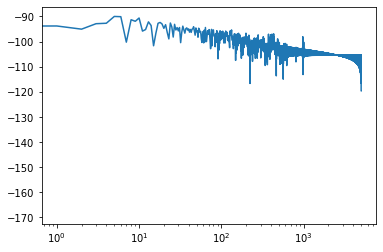

In [5]:
plt.semilogx(np.log(pdgrm))

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans
findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Liberation Sans
findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans' not found because none of the following families were found: Liberation Sans
findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans' not found because none of the following families were found: Liberation Sans
findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans' not found because none of the following families were found: Liberation Sans


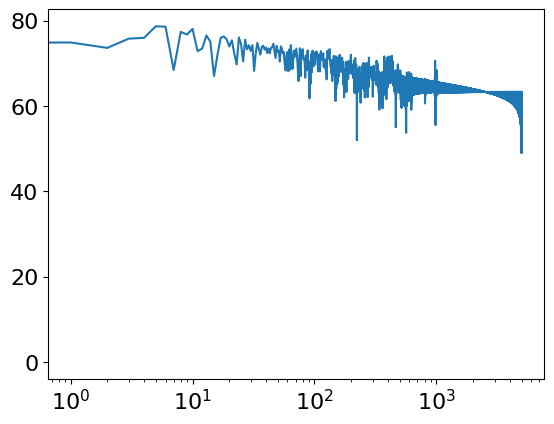

In [7]:
scaled_data = np.log(pdgrm)
scaled_data = scaled_data - np.mean(scaled_data)
scaled_data = scaled_data + np.abs(np.min(scaled_data))
plt.semilogx(scaled_data)



In [12]:
from slipper.sample.spline_model_sampler import fit_data_with_pspline_model



mcmc = fit_data_with_pspline_model(
    data=scaled_data,
    Ntotal=2000,
    burnin=1000,
    degree=3,
    eqSpaced=False,
    
)

MCMC sampling:   0%|          | 0/2000 [00:00<?, ?it/s]

Generating Spline posterior:   0%|          | 0/1000 [00:00<?, ?it/s]

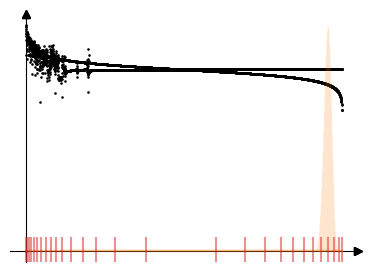

In [13]:
from pspline_psd.plotting.plot_spline_model_and_data import plot_spline_model_and_data

fig = plot_spline_model_and_data(mcmc.data, mcmc.psd_quantiles, knots=mcmc.knots, separarte_y_axis=True)

In [ ]:
# WE NEED A LOG-SPLINE MODEL